In [4]:
import pandas as pd
import numpy as np
import os
import glob
from tasks import compute_index
from tasks.post_process import compare_2020_2019_data_report, make_indicator_box_plots, make_indicator_correlation_matrix
from index.GreenGrowthStuff import GreenGrowthStuff

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def make_indicator_correlation_matrix():
    data = pd.read_csv('data/full_data/result.csv')
    IND_CAT_DIM = GreenGrowthStuff().IND_CAT_DIM
    plot_df = (
        data.query("Aggregation == 'Indicator' and Year == 2020 ")
             .merge(IND_CAT_DIM, left_on='Variable', right_on='Indicator')
    )
    
    
    for dim in ['ESRU', 'NCP', 'GEO', 'SI']:
        
        corr = plot_df.query('Dimension == @dim').pivot(index=['ISO', 'Year'], columns=['Variable'], values='Value').corr()
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(corr, annot=False, center=0, linewidths=.01, ax=ax, cmap='coolwarm')
        plt.savefig(f'plots/{dim}_indicator_corrmatrix.png')
    return None



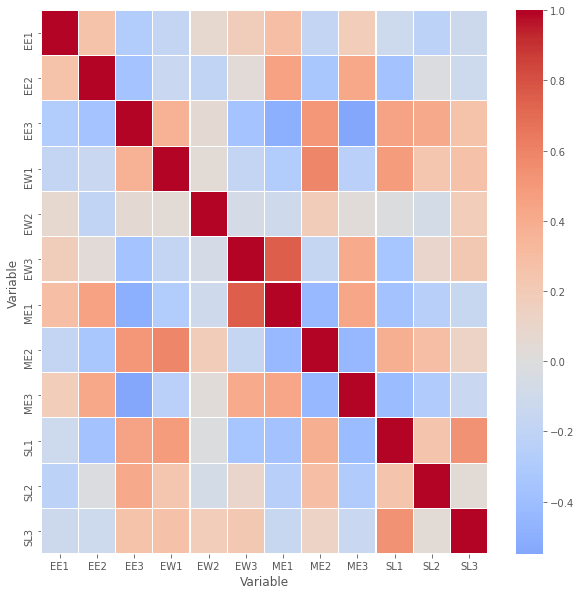

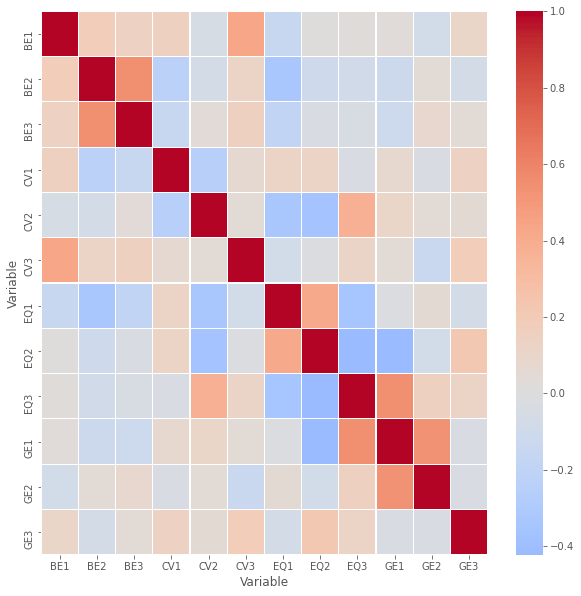

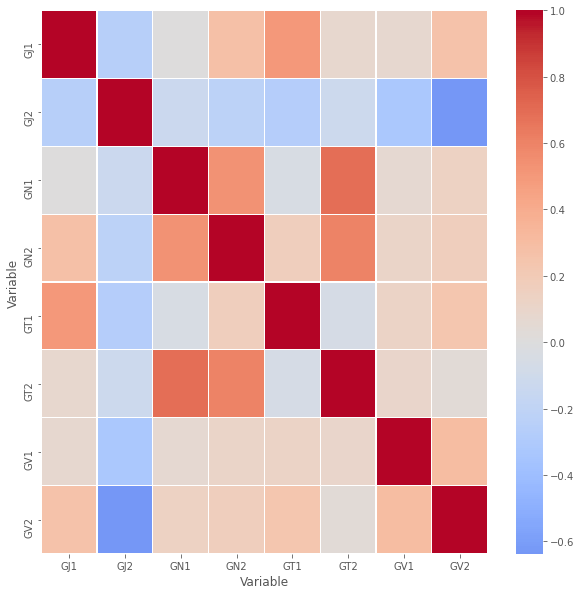

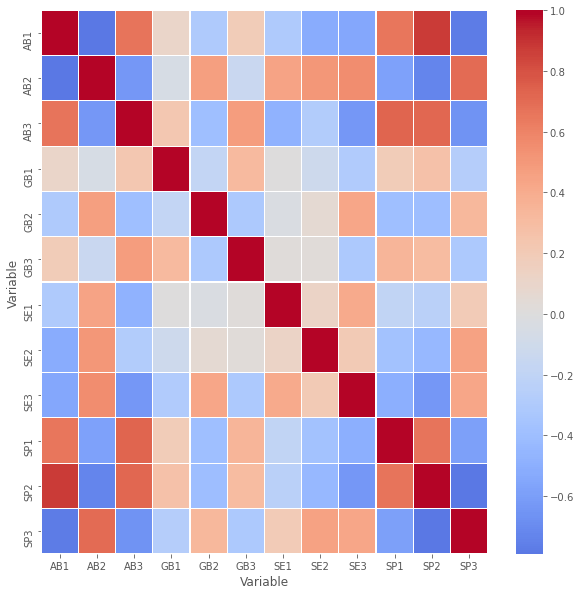

In [8]:
make_indicator_correlation_matrix()

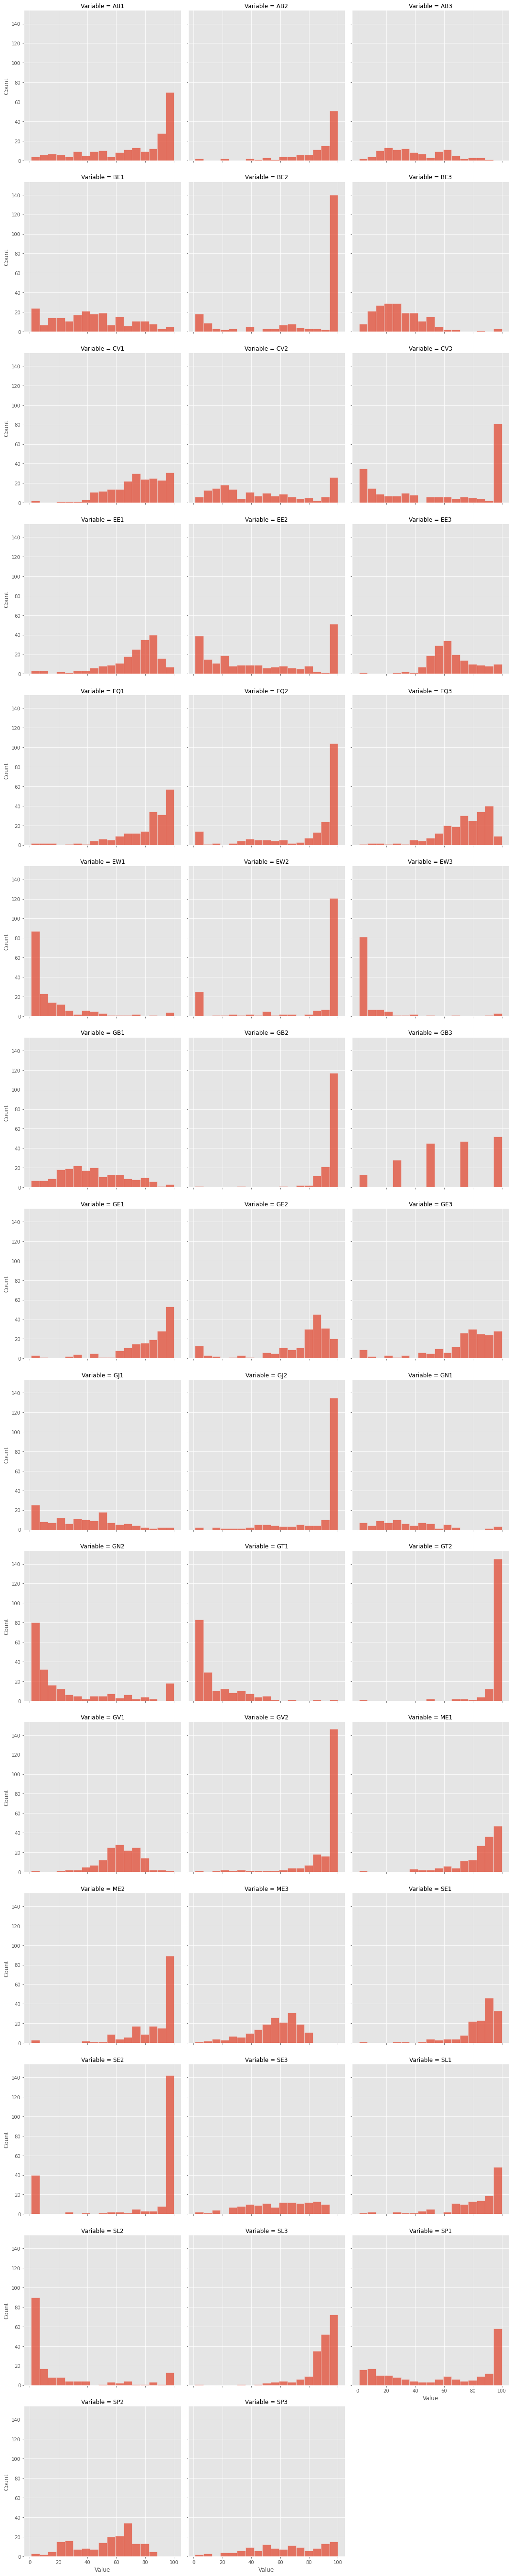

In [14]:
make_indicator_historgrams()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plot_df = test.query("Aggregation in ['Indicator_normed'] and Year == 2020").sort_values(by='Variable').dropna()
sns.displot(data=plot_df, x="Value", col="Variable", kind="hist", col_wrap=3)

In [ ]:
def make_indicator_correlation_matrix():
    data = pd.read_csv('data/full_data/result.csv')
    IND_CAT_DIM = GreenGrowthStuff().IND_CAT_DIM
    plot_df = (
        data.query("Aggregation == 'Indicator' and Year == 2020 ")
             .merge(IND_CAT_DIM, left_on='Variable', right_on='Indicator')
    )
    
    corr = plot_df.pivot(index=['ISO', 'Year'], columns=['Variable'], values='Value').corr()
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, annot=False, center=0, linewidths=.01, ax=ax, cmap='coolwarm')
    ax.set_title('Indicator Correlation Matrix')
    plt.savefig('plots/indicator_corrmatrix.png')
    return None

In [ ]:
make_indicator_correlation_matrix()

In [ ]:
corr =test.pivot(index=['ISO', 'Year'], columns=['Variable'], values='Value').corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:

def plots_by_dimension():
    plot_df = (
    data.query("Aggregation == 'Indicator' and Year == 2020 ")
    .merge(IND_CAT_DIM, left_on='Variable', right_on='Indicator'))
    
    print("All Available Dimension: " , plot_df.Dimension.unique())
    for dimension in plot_df.Dimension.unique():
        fig = px.box(plot_df.query(f'Dimension == "{dimension}"'), y='Value', points="all" ,hover_data=['ISO', 'Country'], facet_col='Variable', facet_col_wrap=3).update_yaxes(matches=None, showticklabels=True)
        fig.write_html(f"plots/{dimension}_boxplot.html")
        
    fig = px.scatter_matrix(plot_df.query("Dimension == 'GEO'").pivot(index=['ISO'], columns=['Variable'], values='Value')) # change <GEO> for differnt dimensions      
    fig.show()


In [ ]:
A = {'a', 'b', 'c'}
B = {'c', 'd', 'e'}

In [ ]:
A - B

In [ ]:
B - A

In [ ]:
df = pd.read_csv('data/full_data/result.csv')

In [ ]:
df[df.Variable.isna()]

In [ ]:
df.dropna(subset=['Variable', 'Value', 'Aggregation', 'Year', 'IncomeLevel'])

In [ ]:
df = pd.read_csv('data/full_data/data.csv')

In [ ]:
IND_CAT_DIM = GreenGrowthStuff().IND_CAT_DIM

In [ ]:
plot_df = (
    data.query("Aggregation == 'Indicator' and Year == 2020 ")
        .merge(IND_CAT_DIM, left_on='Variable', right_on='Indicator')
)


In [ ]:
for category in plot_df.Category.unique():
    
    fig = px.box(plot_df.query(f'Category == "{category}"'), y='Value', points="all" ,hover_data=['ISO', 'Country'], facet_col='Variable', facet_col_wrap=3).update_yaxes(matches=None, showticklabels=True)
    fig.write_html(f"plots/{category}_boxplot.html")

In [ ]:
plot_df.query("Dimension == 'SI'")

In [ ]:

fig = px.scatter_matrix(plot_df.query("Category == 'AB'").pivot(index=['ISO'], columns=['Variable'], values='Value'))
fig.show()


In [ ]:
plot_df = data.query("Aggregation == 'Indicator' and Year == 2020 and Variable in ['AB2','AB1', 'AB3']")

px.box(plot_df, x='Value', hover_data=['ISO', 'Country'], y='Variable').update_xaxes(matches=None)

# For the results

In [ ]:
def make_2019_2020_correlation_report():
    
    data_2019 = pd.read_csv('data/2019_archive/result.csv').assign(version='v_2019')
    data_2020 = pd.read_csv('data/full_data/result.csv').assign(version='v_2020')
    data = pd.concat([data_2019, data_2020], axis=0).dropna(subset=['Value'])
    ISO_with_index = data.query("Aggregation == 'Index'").dropna().ISO.unique() # Select only ISOs where the full index is computed to remove some noise
    data = data[data.ISO.isin(ISO_with_index)]
    
    pivoted_data = data.pivot(index=['Variable', 'Aggregation', 'ISO', 'Year'], columns=['version'], values='Value')
    
    corr_by_var = pivoted_data.groupby(['Variable', 'Aggregation']).apply(lambda x: x[['v_2019', 'v_2020']].dropna().corr().values[0, 1]).to_frame(name='corr')
    corr_by_var_ISO = pivoted_data.groupby(['Variable', 'Aggregation', 'ISO']).apply(lambda x: x[['v_2019', 'v_2020']].dropna().corr().values[0, 1]).to_frame(name='corr')


    return pivoted_data, corr_by_var.reset_index(), corr_by_var_ISO.reset_index()


In [ ]:
data, corr_by_var , corr_by_var_ISO = make_2019_2020_correlation_report()

In [ ]:
corr_by_var.query('Aggregation == "Indicator" and corr < 0.9')

In [ ]:
corr_by_var.query('Aggregation == "Indicator_normed" and corr < 0.9')

In [ ]:
corr_by_var.query('Aggregation == "Category" and corr < 0.9')

In [ ]:
data.loc['Index', :, :, 2019].sort_values(by="v_2020").tail(30)

In [ ]:
data.loc['Index', :, :, 2019].sort_values(by="v_2019").tail(30)

In [ ]:
data.loc[:, 'Category', 'AFG', 2020]

In [ ]:
test = pd.read_csv('data/full_data/data.csv')

In [ ]:
test.query("Indicator == 'ME1' and ISO == 'FRA'")

In [ ]:
pd.read_csv('data/indicator/SL1/processed/SL1_origin.M.csv').query("ISO == 'NLD'")

In [ ]:
data.loc['GN1', :, 'FRA', ]

In [ ]:
data.loc['ME1', :, 'USA', ]

In [ ]:
data.loc['SL1', :, 'USA', 2020]

In [ ]:
data.loc[:, 'Dimension', 'USA', 2020]

# SL1:

Problem from last year's version corrected today (Large outliers that where not accounted for and that are now removed.)


New data includes less points some of the values are not computed (eg the outliers, HKG, SGP etc)

**Conclusion**: Using SL1 v_2020 seems more appropriate 

In [ ]:
data.loc['SL1', 'Indicator_normed', : ,2019]['v_2019'].sort_values().head(15)

# GE1

Values are different from last year despite multiple APIs check. It is unclear why the values are different.

TO CHECK but not clear what's going on

In [ ]:
corr_by_var_ISO.query('Variable == "GE1" and Aggregation == "Indicator"').sort_values(by='corr').head(10)

In [ ]:
pd.read_csv('data/indicator/GE1/preprocessed/GE1.0_CW.csv')#.query('ISO == "FRA"')

In [ ]:
pd.read_csv('data/indicator/GE1/computed/GE1.csv').query('ISO == "FRA"')

In [ ]:
data.loc['GE1', 'Indicator', 'FRA']

In [ ]:
data.loc['GE1', 'Indicator', 'ITA' , :]#['v_2019'].sort_values().head(15)

In [ ]:
config = {
            "GGI_code": "GE1.0",
            "params": {
              "gas_ids[]": 326,
              "sector_ids[]": [1299],
              "source_ids[]": [111]
            }
        }

In [ ]:
from download.downloaders import download, CW_Downloader
from processing.api_preprocessors import CW_Preprocessor

In [ ]:
test = download(API_name="CW", path=None, config=config)
test = CW_Preprocessor('GE1.0').json_to_pandas(test['data'])

In [ ]:
pop = pd.read_csv('data/indicator/GE1/processed/GE1.1_WB.csv')

In [ ]:
(test.query('iso_code3== "FRA"').set_index('year').value * 1e6 / pop.query('ISO == "FRA"').set_index('Year')['Value']).dropna()

In [ ]:
data.loc['GE1', 'Indicator', 'FRA']

In [ ]:
pd.read_csv('data/indicator/GE1/processed/GE1.0_CW.csv')

In [ ]:
def process_GE1_0(df):
    df = df.copy()
    piv = df.pivot(index=['iso_code3', 'year'], columns=['sector'], values='value')
    piv['value'] = (piv['Total excluding LUCF'] - piv['Agriculture']) * 1e6
    piv = (
        piv['value'].reset_index().assign(Description='Total excluding LUCF and Agriculture')
                    .assign(data_source='CAIT _and_ PIK')
    )
    
    
    return piv.query('value > 0')

In [ ]:
process_GE1_0(test)

# GE3 

Same as GE1, not clear what the problem is and where it comes from


In [ ]:
config = {
            "GGI_code": "GE3.1",
            "params": {
                "gas_ids[]": [
                    327,
                    328,
                    329
                ],
                "sector_ids[]":[
                    1304,
                    1302
                ],
                "source_ids[]": 111
            }
        }


test = download(API_name="CW", path=None, config=config)


In [ ]:
test = CW_Preprocessor('GE2.0').json_to_pandas(test['data'])

In [ ]:
test

In [ ]:
CW_Downloader('https://www.climatewatchdata.org/api/v1/data/historical_emissions').get_CW_API_ids("sectors")

#  ME1 

Check for a different source

In [ ]:
data.loc['ME1', 'Indicator', 'RWA']

# GN1 

Values are one the right order of magnitude but change from one version to the other, should double check properly and redownload.

In [ ]:

def make_2019_2020_correlation_report_bis():
    
    data_2019 = pd.read_csv('data/2019_archive/data.csv').assign(version='v_2019')
    data_2020 = pd.read_csv('data/full_data/data.csv').assign(version='v_2020')
    data = pd.concat([data_2019, data_2020], axis=0).dropna(subset=['Value'])
    
    pivoted_data = data.pivot(index=['Indicator', 'ISO', 'Year'], columns=['version'], values='Value')
    
    corr_by_var = pivoted_data.groupby(['Indicator']).apply(lambda x: x[['v_2019', 'v_2020']].dropna().corr().values[0, 1]).to_frame(name='corr')
    corr_by_var_ISO = pivoted_data.groupby(['Indicator', 'ISO']).apply(lambda x: x[['v_2019', 'v_2020']].dropna().corr().values[0, 1]).to_frame(name='corr')


    return pivoted_data, corr_by_var.reset_index(), corr_by_var_ISO.reset_index()
data, corr_by_var , corr_by_var_ISO = make_2019_2020_correlation_report_bis()

In [ ]:
corr_by_var.query('corr < 0.9')

In [ ]:
corr_by_var_ISO.query("Indicator == 'GN1'").sort_values(by='corr').dropna().head(20)

In [ ]:
data.loc['GN1', 'ITA']

In [ ]:
corr_by_var_ISO.query('Variable == "GN1" and Aggregation == "Indicator"').sort_values(by='corr').dropna().tail(20)

# SE2

In [ ]:
corr_by_var_ISO.query('Variable == "SE2" and Aggregation == "Indicator"').sort_values(by='corr').head(30)

In [ ]:
data.loc['SE2', 'Indicator', 'RWA']